In [30]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [31]:
with open('iterative.json', 'r') as f:
    iterative_y_list = json.loads(f.read())
with open('random.json', 'r') as f:
    random_y_list = json.loads(f.read())
with open('filtered.json', 'r') as f:
    random_roi_y_list = json.loads(f.read())
with open('iterative_without_heuristic.json', 'r') as f:
    iterative_without_heuristic_y_list = json.loads(f.read())

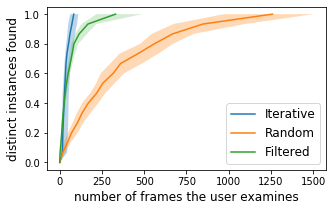

In [44]:
ip_y = []
for plot_data_y in iterative_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    ip_y.append(num_frames_as_y)
ip_y = np.asarray(ip_y)
ip_y_upper = np.percentile(ip_y, 75, axis=0)
ip_y_lower = np.percentile(ip_y, 25, axis=0)
ip_y_mean = np.percentile(ip_y, 50, axis=0)
ip_x_values = np.arange(ip_y.shape[1]) / 15

rp_y = []
for plot_data_y in random_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    rp_y.append(num_frames_as_y)
rp_y = np.asarray(rp_y)
rp_y_upper = np.percentile(rp_y, 75, axis=0)
rp_y_lower = np.percentile(rp_y, 25, axis=0)
rp_y_mean = np.percentile(rp_y, 50, axis=0)
rp_x_values = np.arange(rp_y.shape[1]) / 15

rp_roi_y = []
for plot_data_y in random_roi_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    rp_roi_y.append(num_frames_as_y)
rp_roi_y = np.asarray(rp_roi_y)
rp_roi_y_upper = np.percentile(rp_roi_y, 75, axis=0)
rp_roi_y_lower = np.percentile(rp_roi_y, 25, axis=0)
rp_roi_y_mean = np.percentile(rp_roi_y, 50, axis=0)
rp_roi_x_values = np.arange(rp_roi_y.shape[1]) / 15

# plot it!
fig, ax = plt.subplots(1, figsize=(5, 3))

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(10)


ax.plot(rp_y_mean, rp_x_values, label='Random', color='tab:orange')
ax.plot(rp_roi_y_mean, rp_roi_x_values, label='Filtered', color='tab:green')
ax.plot(ip_y_mean, ip_x_values, label='Iterative', color='tab:blue')
ax.fill_betweenx(rp_x_values, rp_y_lower, rp_y_upper, facecolor='tab:orange', alpha=0.3)
ax.fill_betweenx(rp_roi_x_values, rp_roi_y_lower, rp_roi_y_upper, facecolor='tab:green', alpha=0.3)
ax.fill_betweenx(ip_x_values, ip_y_lower, ip_y_upper, facecolor='tab:blue', alpha=0.3)
ax.legend(loc='lower right', prop={"size":12})
ax.set_xlabel('number of frames the user examines', fontsize=12)
ax.set_ylabel('distinct instances found', fontsize=12)
plt.xticks(np.arange(0, 1501, 250))
# ax.grid()
# ax.set_rasterized(True)
plt.savefig("aggregate.pdf", bbox_inches='tight', pad_inches=0)

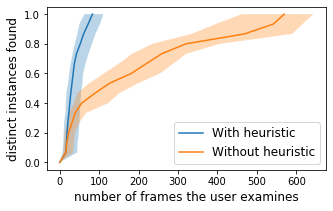

In [48]:
ip_y = []
for plot_data_y in iterative_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    ip_y.append(num_frames_as_y)
ip_y = np.asarray(ip_y)
ip_y_upper = np.percentile(ip_y, 75, axis=0)
ip_y_lower = np.percentile(ip_y, 25, axis=0)
ip_y_mean = np.percentile(ip_y, 50, axis=0)
ip_x_values = np.arange(ip_y.shape[1]) / 15

ip_without_heuristic_y = []
for plot_data_y in iterative_without_heuristic_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    ip_without_heuristic_y.append(num_frames_as_y)
ip_without_heuristic_y = np.asarray(ip_without_heuristic_y)
ip_without_heuristic_y_upper = np.percentile(ip_without_heuristic_y, 75, axis=0)
ip_without_heuristic_y_lower = np.percentile(ip_without_heuristic_y, 25, axis=0)
ip_without_heuristic_y_mean = np.percentile(ip_without_heuristic_y, 50, axis=0)
ip_without_heuristic_x_values = np.arange(ip_without_heuristic_y.shape[1]) / 15

# plot it!
fig, ax = plt.subplots(1, figsize=(5, 3))

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(10)
    
ax.plot(ip_y_mean, ip_x_values, label='With heuristic', color='tab:blue')
ax.plot(ip_without_heuristic_y_mean, ip_without_heuristic_x_values, label='Without heuristic', color='tab:orange')
ax.fill_betweenx(ip_x_values, ip_y_lower, ip_y_upper, facecolor='tab:blue', alpha=0.3)
ax.fill_betweenx(ip_without_heuristic_x_values, ip_without_heuristic_y_lower, ip_without_heuristic_y_upper, facecolor='tab:orange', alpha=0.3)
ax.legend(loc='lower right', prop={"size":12})
ax.set_xlabel('number of frames the user examines', fontsize=12)
ax.set_ylabel('distinct instances found', fontsize=12)
plt.xticks(np.arange(0, 601, 100))
# ax.grid()
# ax.set_rasterized(True)
plt.savefig("heuristic.pdf", bbox_inches='tight', pad_inches=0)

In [34]:
print(ip_y_mean[9], ip_y_mean[-1])
print(ip_without_heuristic_y_mean[9], ip_without_heuristic_y_mean[-1])
print(rp_y_mean[9], rp_y_mean[-1])
print(rp_roi_y_mean[9], rp_roi_y_mean[-1])
print("Finding 60% distinct instances:", rp_y_mean[9]/ip_y_mean[9], rp_roi_y_mean[9]/ip_y_mean[9], ip_without_heuristic_y_mean[9]/ip_y_mean[9])
print("Finding all distinct instances:", rp_y_mean[-1]/ip_y_mean[-1], rp_roi_y_mean[-1]/ip_y_mean[-1], ip_without_heuristic_y_mean[-1]/ip_y_mean[-1])

34.0 83.0
181.5 569.5
316.0 1260.0
49.5 330.5
Finding 60% distinct instances: 9.294117647058824 1.4558823529411764 5.338235294117647
Finding all distinct instances: 15.180722891566266 3.9819277108433737 6.86144578313253
